In [1]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
torchvision
matplotlib
"""

# library
# standard library
import os

# third-party library
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import dataloader as dl

In [2]:

# Hyper Parameters
EPOCH = 3               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
LR = 0.001              # learning rate


In [3]:
myset = dl.FaceVisionSet(train=True)
mytest = dl.FaceVisionSet(train = False)
mytest = [(d , l) for d,l in mytest][:300]

In [4]:
print(mytest[0][0].shape)

(1, 96, 96)


In [5]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=myset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = Data.DataLoader(dataset = mytest, batch_size = 200,shuffle=True)

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 96, 96)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 96, 96)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 48, 48)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 48, 48)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 48, 48)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 24, 24)
        )
        self.out = nn.Linear(32 * 24 * 24, 2)   # fully connected layer, output 10 classes
        self.m = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        output =self.m(output)
        return output, x    # return x for visualization



In [9]:
cnn = CNN()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=18432, out_features=2, bias=True)
  (m): Softmax()
)


In [10]:
# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.6898 | test accuracy: 0.91


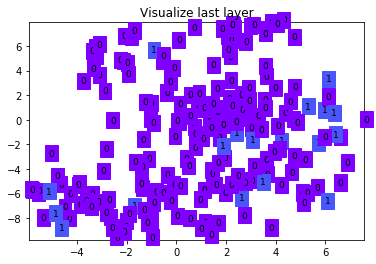

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5008 | test accuracy: 0.91


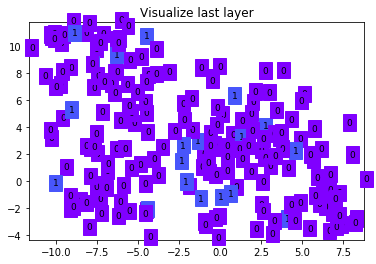

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5476 | test accuracy: 0.90


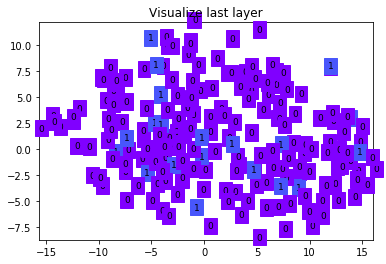

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5008 | test accuracy: 0.91


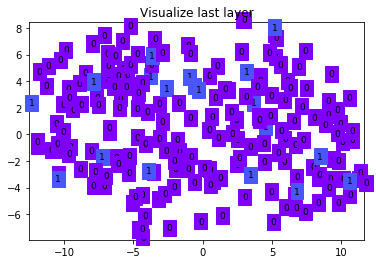

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5008 | test accuracy: 0.93


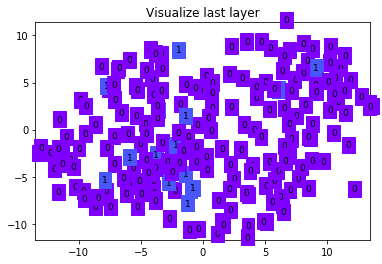

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5476 | test accuracy: 0.90


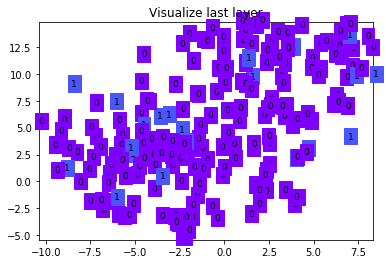

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5008 | test accuracy: 0.89


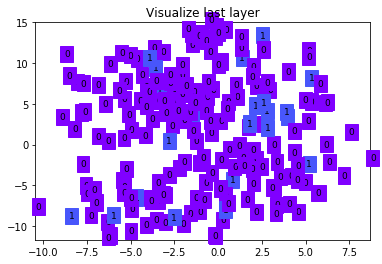

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.4383 | test accuracy: 0.91


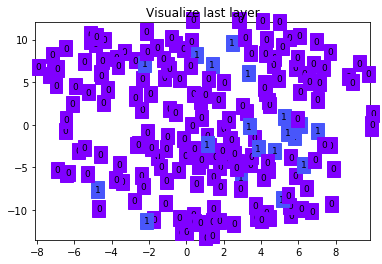

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.5008 | test accuracy: 0.91


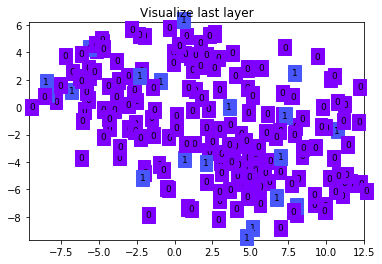

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.4851 | test accuracy: 0.92


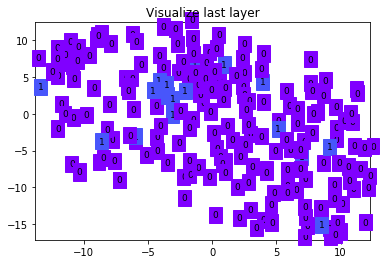

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.4539 | test accuracy: 0.92


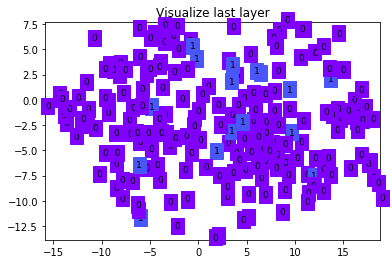

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.5164 | test accuracy: 0.93


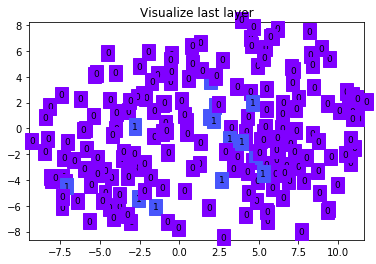

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.5320 | test accuracy: 0.94


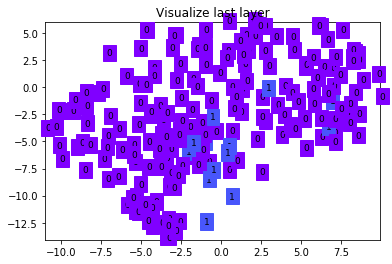

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.5633 | test accuracy: 0.90


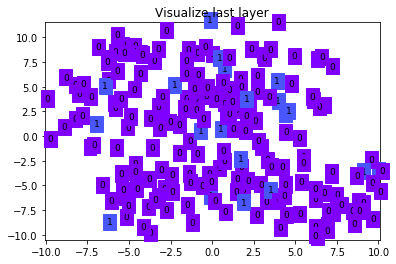

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.4539 | test accuracy: 0.90


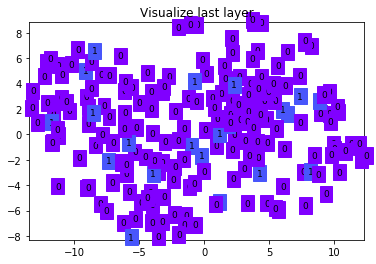

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.5008 | test accuracy: 0.93


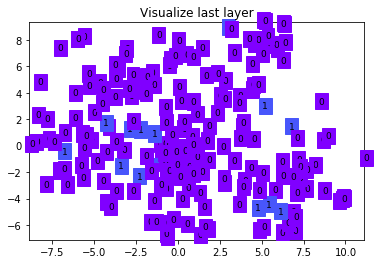

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.5633 | test accuracy: 0.91


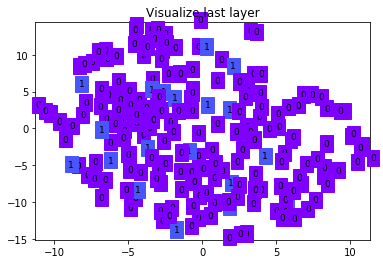

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.4695 | test accuracy: 0.91


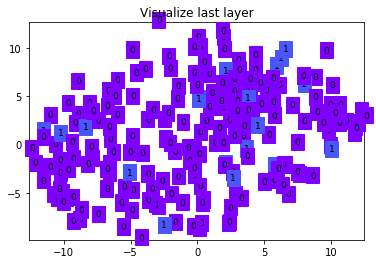

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.5320 | test accuracy: 0.89


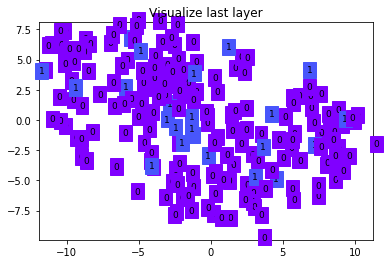

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.4695 | test accuracy: 0.89


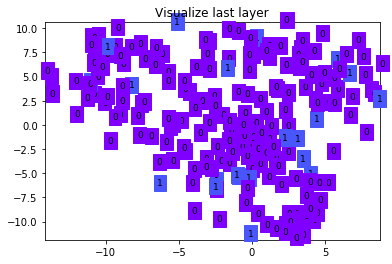

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.4695 | test accuracy: 0.92


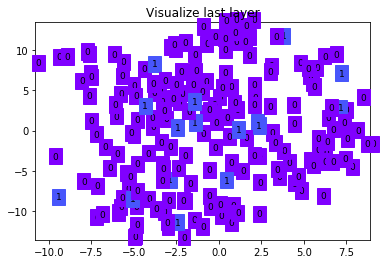

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [11]:

# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
#         print(b_x)
        output = cnn(b_x.float())[0]               # cnn output
#         print(output)
        loss = loss_func(output,b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            for test_x,test_y in test_loader:
                test_output, last_layer = cnn(test_x)
                pred_y = torch.max(test_output, 1)[1].data.numpy()
                accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
                print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
                if HAS_SK:
                    # Visualization of trained flatten layer (T-SNE)
                    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                    plot_only = 500
                    low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                    labels = test_y.numpy()[:plot_only]
                    plot_with_labels(low_dim_embs, labels)
                break
plt.ioff()


In [ ]:
for test_x,test_y in test_loader:
    # print 10 predictions from test data
    test_output, _ = cnn(test_x[:10])
    pred_y = torch.max(test_output, 1)[1].data.numpy()
    print(pred_y, 'prediction number')
    print(test_y[:10].numpy(), 'real number')

以下为PCA的原理验证

In [1]:
import time

import numpy as np
import torch
import torch.nn as nn
import torch.utils.data
import matplotlib.pyplot as plt
import sklearn.svm

import dataloader as dl
import mymodel

In [2]:
def norm(arr):
    mu = np.mean(arr, axis=0)
    var = np.var(arr, axis=0)
    print("norm",end=":")
    printshape([arr,mu,var])
    return (arr-mu)/var

def printshape(l):
    for arr in l:
        print("|shape{}|".format(arr.shape),end="")
    print()

n_feature = 900
n_component = 10

w = np.zeros((n_feature,n_component))

train_data, train_label = dl.load_train_norm()
test_data, test_label = dl.load_test_norm()

print(train_data.shape,train_label.shape)

x = norm(train_data)

(20680, 900) (20680, 1)
norm:|shape(20680, 900)||shape(900,)||shape(900,)|


In [3]:
xk = np.copy(x)

In [4]:
xTx = np.matmul(xk.T,xk)
eigva , eigve = np.linalg.eig(xTx)

In [5]:
indexs = np.argsort(np.abs(eigva))[::-1]

In [6]:
old = eigve[:,indexs[:3]]
old.shape

(900, 3)

In [17]:
i=0
print("模",np.dot(old[:,i],old[:,i]))
print(np.matmul(xTx,old[:,i])/old[:,i])

模 1.0
[1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.68060283e+08 1.68060283e+08 1.68060283e+08
 1.68060283e+08 1.

In [8]:
for comp in range(n_component):
    xkTxk = np.matmul(xk.T,xk)
    eigva , eigve = np.linalg.eig(xkTxk)
    if not comp:
        x_score = np.matmul(x,eigve)
        print(np.var(x_score,axis=0)[:10])         
    # break
    w_comp = eigve[:,np.argmax(np.abs(eigva))] #选取最优解

    w[:, comp] = w_comp #保存

    w_comp = w_comp.reshape(-1,1) 
    xw = np.matmul(x, w_comp)
    print("score:",np.var(xw))
    xk = xk - np.matmul(xw, w_comp.T)
    # print(xk==x)
    printshape([xkTxk,w_comp,xw,xk])

[8126.70613264 6175.79638912 3691.22659189 3497.28209131 3127.98084908
 3025.03835334 2605.28991474 2417.92869294 2225.80853889 1696.62496119]
score: 8126.706132640027
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 6175.796389120235
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 3691.226591888857
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 3497.282091307083
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 3127.980849082572
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|


/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


score: 3025.0383533407503
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 2605.2899147391367
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 2417.9286929429522
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 2225.8085388882523
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 1696.6249611857795
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|


检查特征向量是否正交，检查是否是特征向量

In [27]:
i=5
print("模",np.dot(w[:,i],w[:,i]))
print("不变性",np.matmul(xTx,w[:,i])/w[:,i])

模 1.0000000000000004
不变性 [62557793.14708806 62557793.14708757 62557793.14708658 62557793.14708656
 62557793.14708675 62557793.1470868  62557793.14708617 62557793.14708742
 62557793.14708671 62557793.14708661 62557793.1470869  62557793.14708635
 62557793.14708664 62557793.14708678 62557793.14708662 62557793.14708631
 62557793.14708707 62557793.14708683 62557793.14708611 62557793.14708669
 62557793.14708666 62557793.14708669 62557793.14708907 62557793.14708652
 62557793.14708558 62557793.14708779 62557793.14708719 62557793.14708675
 62557793.1470867  62557793.14708638 62557793.14708667 62557793.14708709
 62557793.14708656 62557793.14708567 62557793.14708692 62557793.14708678
 62557793.1470864  62557793.14708861 62557793.14708664 62557793.14708667
 62557793.14708673 62557793.14708664 62557793.14708654 62557793.14711153
 62557793.1470869  62557793.14708671 62557793.14708677 62557793.14708667
 62557793.14708615 62557793.14708688 62557793.14708665 62557793.14708655
 62557793.14708427 6255779

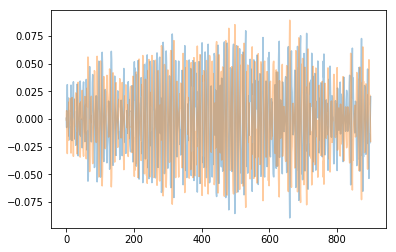

In [30]:
i=2
plt.plot(w[:,i],alpha=0.4)
plt.plot(old[:,i],alpha=0.4)
plt.show()

In [31]:
np.linalg.svd(xTx)

(array([[-3.53741462e-02, -8.84348436e-03,  7.73127956e-04, ...,
         -1.94647284e-03,  4.47633093e-03,  2.84927781e-04],
        [ 6.91247964e-02,  1.11337464e-02, -7.61491898e-03, ...,
         -2.73280164e-04,  2.60218266e-05, -9.23721255e-05],
        [ 6.30274506e-02,  1.14815145e-02,  1.27511285e-02, ...,
         -8.53668709e-05,  6.52379393e-04,  6.68997871e-04],
        ...,
        [-9.60860313e-04, -1.22950361e-02, -1.07079850e-02, ...,
         -3.84531197e-04,  1.28216455e-03,  6.76783688e-04],
        [-2.12906918e-03, -1.89076414e-02,  4.89707994e-03, ...,
          1.06369382e-04, -1.25414172e-03, -4.99736876e-04],
        [-5.83148004e-03, -2.41849251e-02,  2.02443068e-02, ...,
          1.28985700e-04,  9.09282867e-04,  4.85902155e-04]]),
 array([1.68060283e+08, 1.27715469e+08, 7.63345659e+07, 7.23237936e+07,
        6.46866440e+07, 6.25577931e+07, 5.38773954e+07, 5.00027654e+07,
        4.60297206e+07, 3.50862042e+07, 3.17303192e+07, 3.09677018e+07,
        2.866

(20680, 900) (20680, 1)
norm:|shape(20680, 900)||shape(900,)||shape(900,)|
[8126.70613264 6175.79638912 3691.22659189 3497.28209131 3127.98084908
 3025.03835334 2605.28991474 2417.92869294 2225.80853889 1696.62496119]
score: 112.8429294348888
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 81.2542774921197
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 115.19179009186571
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 125.52516014923187
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 59.67634362361648
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 124.31449796761547
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 191.25937376236158
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 106.70983742089192
|shape(900, 900)||shape(900, 1)||shape(20680, 1)||shape(20680, 900)|
score: 103.51246075668867


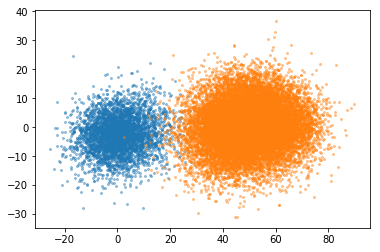

[[ 3.53741462e-02  3.39512007e-02  3.40315774e-02 ... -2.92994763e-02
  -2.86458959e-02 -2.74955708e-02]
 [ 8.84348436e-03 -7.36642852e-03  7.92993107e-03 ...  1.42473392e-02
   1.33058119e-02 -1.33094922e-02]
 [-7.73127956e-04 -9.54026246e-04 -3.08551598e-04 ...  9.11677671e-04
   7.56396520e-04  1.16726063e-03]
 ...
 [ 2.43178074e-03 -4.09876658e-04  8.73410356e-04 ... -1.72943618e-02
  -4.07564405e-04  1.48380196e-03]
 [ 7.33435495e-06  1.05759240e-02 -2.43739824e-03 ... -1.01594863e-02
   1.31810295e-03 -8.50730337e-04]
 [-3.19484173e-05 -2.54325679e-05 -2.38231798e-03 ... -4.33485578e-04
   1.04823057e-04 -3.30036358e-05]]


In [2]:


x_proj = np.matmul(x,w)
printshape([x_proj,train_label])
x_label = np.squeeze(train_label)

x_proj_var = np.var(x_proj,axis=0)

comp_list = [np.argmin(x_proj_var)]

for comp in comp_list:#range(n_component):
    plt.scatter(x_proj[x_label == 1, 0], x_proj[x_label == 1, comp],alpha=0.4,s=4)
    plt.scatter(x_proj[x_label == -1, 0]+50, x_proj[x_label == -1, comp],alpha=0.4,s=4)
    plt.show()
print("===========")
print(w)


/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


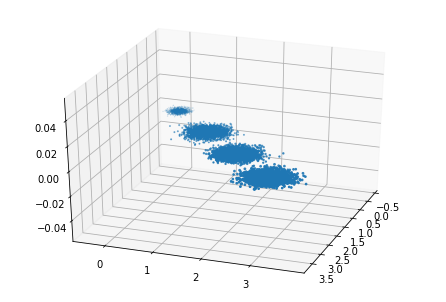

[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]
[0.98318212 0.00850037]
[3.78521638 0.03272613]
[0.98318212 0.00850037]
[3.78521638 0.03272613]


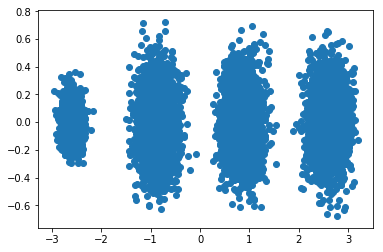

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
#X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')
plt.show()
#先不降维，只对数据进行投影，看看投影后的三个维度的方差分布
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
#返回所保留的n个成分各自的方差百分比
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
#进行降维，从三维降到2维
pca1 = PCA(n_components=2)
pca1.fit(X)
print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)
#返回所保留的n个成分各自的方差百分比
print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)
'''通过对比，因为上面三个投影后的特征维度的方差分别为：
[ 3.78483785  0.03272285  0.03201892]，投影到二维后选择的肯定是前两个特征，而抛弃第三个特征'''
#将降维后的2维数据进行可视化
X_new = pca1.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()


In [10]:
X_new[:,0].shape

(10000,)